In [130]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [131]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [132]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x =  torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [133]:
def plot_accuracy_loss(training_result):
    plt.subplot(1, 2, 1)
    plt.plot(training_results['training loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [134]:
def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [135]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap = "gray")
    plt.show()

In [136]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training loss': [], 'validation accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            
            loss = criterion(z, y)
            loss.backward()
            
            optimizer.step()
            
            useful_stuff['training loss'].append(loss.data.item())
            
        print("epoch: ", epoch,"/",epochs,"  loss: ", loss.data.item())
            
        correct = 0
        
        for x, y in validation_loader:
            
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z, 1)
            
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct/len(validation_dataset))
        
        useful_stuff['validation accuracy'].append(accuracy)
        
    return useful_stuff
                          
            

In [137]:
train_dataset = dsets.MNIST(root = './data', train=True, download = True, transform = transforms.ToTensor())

In [138]:
validation_dataset = dsets.MNIST(root = './data', download = True, transform = transforms.ToTensor())

In [139]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 2000, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 5000, shuffle = False) 

In [140]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [141]:
criterion = nn.CrossEntropyLoss()

In [142]:
print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [143]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [144]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 10) 

epoch:  0 / 10   loss:  2.26084566116333
epoch:  1 / 10   loss:  2.206244945526123
epoch:  2 / 10   loss:  2.1394622325897217
epoch:  3 / 10   loss:  2.070553779602051
epoch:  4 / 10   loss:  1.9853497743606567
epoch:  5 / 10   loss:  1.8979346752166748
epoch:  6 / 10   loss:  1.8130015134811401
epoch:  7 / 10   loss:  1.70972740650177
epoch:  8 / 10   loss:  1.6065183877944946
epoch:  9 / 10   loss:  1.5128834247589111


/tmp/ipykernel_7114/689836694.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


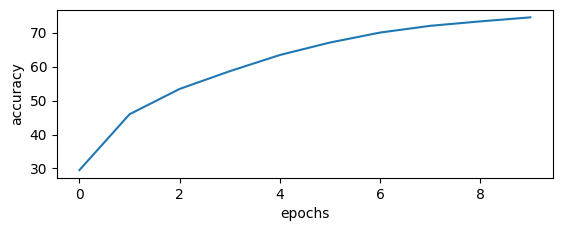

In [145]:
plot_accuracy_loss(training_results)

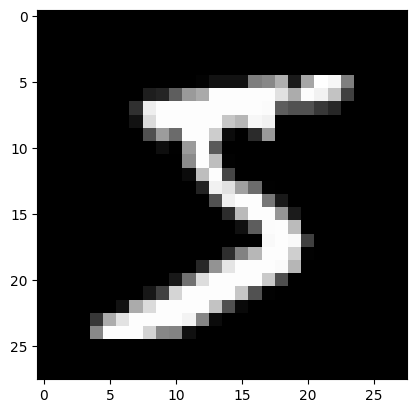

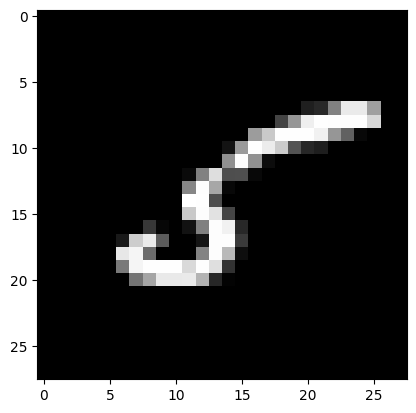

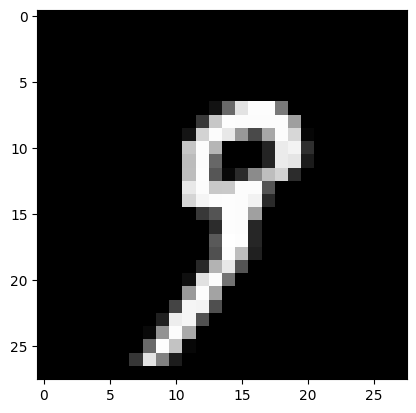

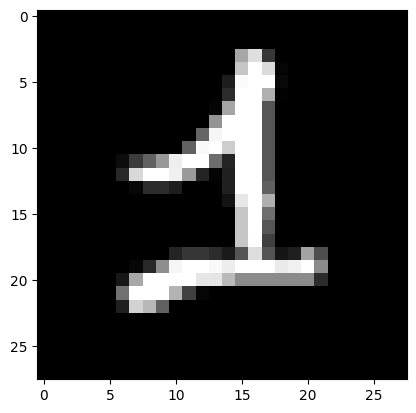

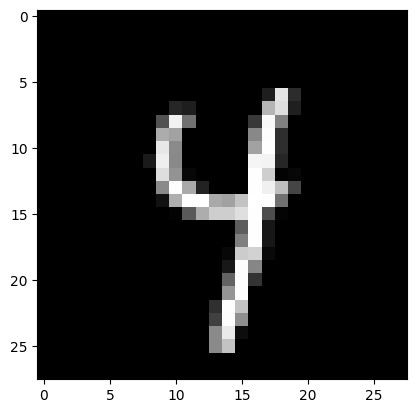

In [146]:
count = 0
for x, y in validation_dataset: 
    z = model(x.reshape(-1, 28*28))
    _, yhat = torch.max(z, 1)
    
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break
    

In [147]:
print(np.max(training_results['validation accuracy']))

74.49666666666667
